In [10]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import io
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from google.colab import files
import seaborn as sns

In [11]:
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.ExcelFile(file_path)

Saving Final Project_V1.xlsx to Final Project_V1 (1).xlsx


In [12]:
df = data.parse('Sheet2')
display(df.head())

,Regulation,Day,Comparison,Alpha A30P_day_1_1,Alpha A30P_day_1_2,Alpha A30P_day_10_1,Alpha A30P_day_10_2,Alpha A53T_day_1_1,Alpha A53T_day_1_2,Alpha A53T_day_10_1,...,Alpha _day_30_1,Alpha _day_30_2,Protein names,Gene names,Protein IDs,GOBP name,GOMF name,GOCC name,KEGG name,Unnamed: 26
0,Up_regulated,Day 1,Alpha vs A53T,2.57750,2.0442,2.16760,2.54700,1.14000,0.98218,0.86422,...,1.64380,1.57050,NaN,CG1665-RA,A1Z803,metabolic process,binding;catalytic activity;cation binding;cofa...,NaN,NaN,NaN
1,Down_regulated,Day 1,Alpha vs A53T,0.49432,0.5146,1.58760,1.56430,0.80689,0.72308,2.60850,...,3.16790,3.12250,Larval serum protein 1 beta chain,Lsp1beta,P11996,cell communication;cell-cell signaling;cell-ce...,nutrient reservoir activity,cell part;cytoplasmic part;extracellular regio...,NaN,NaN
2,Up_regulated,Day 1,Alpha vs A53T,27.24200,23.7750,0.90714,0.87489,21.88400,22.34800,1.53070,...,0.97544,0.84012,NaN,NaN,Q9VT23,macromolecule metabolic process;metabolic proc...,catalytic activity;endopeptidase activity;hydr...,NaN,NaN,NaN
3,Up_regulated,Day 1,Alpha vs A53T,4.24620,3.4315,1.40760,1.35430,3.40610,3.41930,1.54420,...,1.22600,1.19240,Vitellogenin-2,Yp2,P02844,cell differentiation;cellular developmental pr...,catalytic activity,cell part;cytoplasmic part;cytoskeletal part;e...,NaN,NaN
4,Up_regulated,Day 1,Alpha vs A30T,6.36170,4.5211,1.90900,2.10230,5.57060,4.86890,2.38170,...,1.23130,1.19150,Vitellogenin-1,Yp1,P02843,developmental process;developmental process in...,catalytic activity,cell part;cytoplasmic part;cytoskeletal part;e...,NaN,NaN


In [19]:
# Define groups to compute mean + SEM, using actual column names
groups = {
    "Alpha_day_1": [col for col in df.columns if ('Alpha A53T_day_1' in col or 'Alpha A30P_day_1' in col) and ('_1' in col or '_2' in col)],
    "Alpha_day_10": [col for col in df.columns if ('Alpha A53T_day_10' in col or 'Alpha A30P_day_10' in col) and ('_1' in col or '_2' in col)],
    "Alpha_day_30": [col for col in df.columns if 'Alpha A53T_day_30' in col and ('_1' in col or '_2' in col)], # A30P_day_30 data is not available

    "A53T_day_1": [col for col in df.columns if 'Alpha A53T_day_1' in col and ('_1' in col or '_2' in col)],
    "A53T_day_10": [col for col in df.columns if 'Alpha A53T_day_10' in col and ('_1' in col or '_2' in col)],
    "A53T_day_30": [col for col in df.columns if 'Alpha A53T_day_30' in col and ('_1' in col or '_2' in col)],

    "A30P_day_1": [col for col in df.columns if 'Alpha A30P_day_1' in col and ('_1' in col or '_2' in col)],
    "A30P_day_10": [col for col in df.columns if 'Alpha A30P_day_10' in col and ('_1' in col or '_2' in col)],
}

# Compute mean and SEM for each group
mean_table = pd.DataFrame()
sem_table = pd.DataFrame()

for cond, cols in groups.items():
    if cols:
        mean_table[cond] = df[cols].mean(axis=1)
        sem_table[cond] = df[cols].sem(axis=1)
    else:
        mean_table[cond] = np.nan
        sem_table[cond] = np.nan


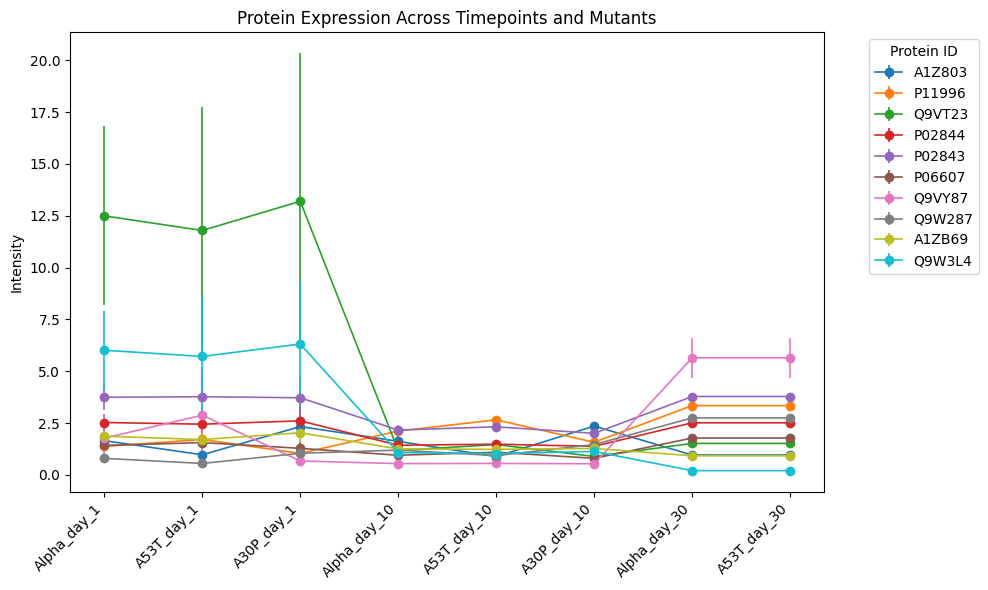

In [22]:
# X-axis order
conditions_order = [
    "Alpha_day_1","A53T_day_1", "A30P_day_1", "Alpha_day_10","A53T_day_10", "A30P_day_10", "Alpha_day_30",
     "A53T_day_30"
]

# Plot each protein ID separately
plt.figure(figsize=(10,6))

for i, protein in enumerate(df["Protein IDs"]):
    y = mean_table.loc[i, conditions_order]
    yerr = sem_table.loc[i, conditions_order]

    plt.errorbar(
        conditions_order,
        y,
        yerr=yerr,
        marker="o",
        linewidth=1.2,
        label=protein
    )

plt.xticks(rotation=45, ha="right")
plt.ylabel("Intensity")
plt.title("Protein Expression Across Timepoints and Mutants")
plt.legend(title="Protein ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()